# Setting up a PEST interface from MODFLOW6 using the `PstFrom` class

The `PstFrom` class is a generalization of the prototype `PstFromFlopy` class. The generalization in `PstFrom` means users need to explicitly define what files are to be parameterized and what files contain model outputs to treat as observations.  Two primary types of files are supported:  arrays and lists.  Array files contain a data type (usually floating points) while list files will have a few columns that contain index information and then columns of floating point values.  

In [43]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyemu
import flopy

An existing MODFLOW6 model is in the directory `freyberg_mf6`.  Lets check it out:

In [2]:
org_model_ws = os.path.join('freyberg_mf6')
os.listdir(org_model_ws)

['freyberg6.wel_stress_period_data_20.txt',
 'freyberg6.rch_recharge_2.txt',
 'freyberg6.sfr_perioddata_13.txt',
 'freyberg6.sfr_perioddata_3.txt',
 'freyberg6.rch_recharge_14.txt',
 'freyberg6_freyberg.hds',
 'freyberg6.dis_idomain_layer1.txt',
 'freyberg6.rch_recharge_15.txt',
 'freyberg6.sfr_perioddata_2.txt',
 'freyberg6.sfr_perioddata_12.txt',
 'freyberg6.rch_recharge_3.txt',
 'freyberg6.wel_stress_period_data_21.txt',
 'freyberg6.wel_stress_period_data_23.txt',
 'freyberg6.rch_recharge_1.txt',
 'freyberg6.sfr_perioddata_10.txt',
 'freyberg6.rch_recharge_17.txt',
 'freyberg6.dis_idomain_layer3.txt',
 'freyberg6.ghb_stress_period_data_1.txt',
 'freyberg6.dis_idomain_layer2.txt',
 'freyberg6.sfr_perioddata_1.txt',
 'freyberg6.rch_recharge_16.txt',
 'freyberg6.sfr_perioddata_11.txt',
 'freyberg6.sfr_connectiondata.txt',
 'freyberg6.wel_stress_period_data_22.txt',
 'freyberg6.sto_sy_layer3.txt',
 'freyberg6.sfr_perioddata_15.txt',
 'freyberg6.rch_recharge_4.txt',
 'freyberg6.dis_top.t

You can see that all the input array and list data for this model have been written "externally" - this is key to using the `PstFrom` class. 

Now let's copy those files to a temporary location just to make sure we don't goof up those original files:


In [3]:
tmp_model_ws = "temp_pst_from"
if os.path.exists(tmp_model_ws):
    shutil.rmtree(tmp_model_ws)
shutil.copytree(org_model_ws,tmp_model_ws)
os.listdir(tmp_model_ws)

['freyberg6.wel_stress_period_data_20.txt',
 'freyberg6.rch_recharge_2.txt',
 'freyberg6.sfr_perioddata_13.txt',
 'freyberg6.sfr_perioddata_3.txt',
 'freyberg6.rch_recharge_14.txt',
 'freyberg6_freyberg.hds',
 'freyberg6.dis_idomain_layer1.txt',
 'freyberg6.rch_recharge_15.txt',
 'freyberg6.sfr_perioddata_2.txt',
 'freyberg6.sfr_perioddata_12.txt',
 'freyberg6.rch_recharge_3.txt',
 'freyberg6.wel_stress_period_data_21.txt',
 'freyberg6.wel_stress_period_data_23.txt',
 'freyberg6.rch_recharge_1.txt',
 'freyberg6.sfr_perioddata_10.txt',
 'freyberg6.rch_recharge_17.txt',
 'freyberg6.dis_idomain_layer3.txt',
 'freyberg6.ghb_stress_period_data_1.txt',
 'freyberg6.dis_idomain_layer2.txt',
 'freyberg6.sfr_perioddata_1.txt',
 'freyberg6.rch_recharge_16.txt',
 'freyberg6.sfr_perioddata_11.txt',
 'freyberg6.sfr_connectiondata.txt',
 'freyberg6.wel_stress_period_data_22.txt',
 'freyberg6.sto_sy_layer3.txt',
 'freyberg6.sfr_perioddata_15.txt',
 'freyberg6.rch_recharge_4.txt',
 'freyberg6.dis_top.t

Now we need just a tiny bit of info about the spatial discretization of the model - this is needed to work out separation distances between parameters for build a geostatistical prior covariance matrix later...

In [4]:
sim = flopy.mf6.MFSimulation.load(sim_ws=tmp_model_ws)
m = sim.get_model("freyberg6")


loading simulation...
  loading simulation name file...
  loading tdis package...
  loading model gwf6...
    loading package dis...
    loading package ic...
    loading package npf...
    loading package sto...
    loading package oc...
    loading package wel...
    loading package rch...
    loading package ghb...
    loading package sfr...
    loading package obs...
  loading ims package freyberg6...


In [5]:
sr = pyemu.helpers.SpatialReference.from_namfile(
        os.path.join(tmp_model_ws, "freyberg6.nam"),
        delr=m.dis.delr.array, delc=m.dis.delc.array)
sr

   could not remove start_datetime


xul:0; yul:10000; rotation:0; proj4_str:None; units:meters; lenuni:2; length_multiplier:1.0

Now we can instantiate a `PstFrom` class instance

In [6]:
template_ws = "freyberg6_template"
pf = pyemu.prototypes.PstFrom(original_d=tmp_model_ws, new_d=template_ws,
                 remove_existing=True,
                 longnames=True, spatial_reference=sr,
                 zero_based=False,start_datetime="1-1-2018")

2020-05-08 11:11:12.202878 starting: opening PstFrom.log for logging
2020-05-08 11:11:12.203133 starting PstFrom process
2020-05-08 11:11:12.203576 starting: setting up dirs
2020-05-08 11:11:12.203746 starting: removing existing new_d 'freyberg6_template'
2020-05-08 11:11:12.221179 finished: removing existing new_d 'freyberg6_template' took: 0:00:00.017433
2020-05-08 11:11:12.221273 starting: copying original_d 'temp_pst_from' to new_d 'freyberg6_template'
2020-05-08 11:11:12.272538 finished: copying original_d 'temp_pst_from' to new_d 'freyberg6_template' took: 0:00:00.051265
2020-05-08 11:11:12.272920 finished: setting up dirs took: 0:00:00.069344


So now that we have a `PstFrom` instance, we need to add some PEST interface "observations" and "parameters".  Let's start with observations using MODFLOW6 head.  These are stored in `heads.csv`:

In [7]:
df = pd.read_csv(os.path.join(tmp_model_ws,"heads.csv"),index_col=0)
df

,TRGW_2_2_15,TRGW_2_2_9,TRGW_2_3_8,TRGW_2_9_1,TRGW_2_13_10,TRGW_2_15_16,TRGW_2_21_10,TRGW_2_22_15,TRGW_2_24_4,TRGW_2_26_6,...,TRGW_0_9_1,TRGW_0_13_10,TRGW_0_15_16,TRGW_0_21_10,TRGW_0_22_15,TRGW_0_24_4,TRGW_0_26_6,TRGW_0_29_15,TRGW_0_33_7,TRGW_0_34_10
time,,,,,,,,,,,,,,,,,,,,,
1.0,34.339372,34.581653,34.611271,34.872236,34.257588,34.136404,34.144487,34.027672,34.310869,34.171624,...,34.878147,34.263202,34.141617,34.150089,33.992380,34.316582,34.177245,33.909885,33.985756,33.890226
32.0,34.422185,34.680237,34.711364,34.972440,34.380690,34.245123,34.271719,34.137529,34.436670,34.312654,...,34.978308,34.385574,34.249921,34.276462,34.086955,34.441557,34.317000,33.992042,34.101898,34.004997
61.0,34.495577,34.777642,34.811214,35.082668,34.481042,34.329750,34.375621,34.218584,34.553940,34.426574,...,35.088566,34.486939,34.335503,34.381386,34.157456,34.559386,34.432021,34.057642,34.195197,34.085663
92.0,34.540966,34.847690,34.884088,35.176852,34.535381,34.371788,34.431026,34.257090,34.630529,34.489744,...,35.183003,34.542429,34.378474,34.438019,34.191072,34.636992,34.496503,34.090249,34.243224,34.120639
122.0,34.537692,34.858948,34.897412,35.213451,34.519537,34.352890,34.413872,34.236319,34.633038,34.475282,...,35.219955,34.527373,34.360122,34.421738,34.173384,34.640429,34.483080,34.076125,34.225432,34.094988
153.0,34.485665,34.805410,34.844360,35.178093,34.436538,34.277193,34.326062,34.159879,34.555096,34.382574,...,35.184970,34.444549,34.284359,34.334209,34.107416,34.563074,34.390877,34.017332,34.144442,34.014826
183.0,34.399847,34.701522,34.739064,35.076753,34.311512,34.167961,34.194918,34.051615,34.420773,34.240694,...,35.083914,34.319099,34.174579,34.202683,34.013693,34.428786,34.248822,33.931927,34.025465,33.904396
214.0,34.299522,34.569980,34.604429,34.930548,34.172792,34.050218,34.050299,33.936360,34.259318,34.081111,...,34.937729,34.179416,34.055879,34.057091,33.913596,34.266768,34.088387,33.839822,33.895627,33.789732
245.0,34.213977,34.449149,34.479660,34.781462,34.059659,33.957166,33.933007,33.846250,34.116792,33.948424,...,34.788420,34.065183,33.961867,33.938650,33.835118,34.123339,33.954564,33.767182,33.791731,33.702517


The main entry point for adding observations is (surprise) `PstFrom.add_observations()`.  This method works on the list-type observation output file.  We need to tell it what column is the index column (can be string if there is a header or int if no header) and then what columns contain quantities we want to monitor (e.g. "observe") in the control file - in this case we want to monitor all columns except the index column:

In [8]:
hds_df = pf.add_observations("heads.csv",insfile="heads.csv.ins",index_cols="time",
                    use_cols=list(df.columns.values),prefix="hds")
hds_df

2020-05-08 11:11:12.314314 starting: adding observations from tabular output file
2020-05-08 11:11:12.314539 starting: reading list freyberg6_template/heads.csv
2020-05-08 11:11:12.317792 finished: reading list freyberg6_template/heads.csv took: 0:00:00.003253
2020-05-08 11:11:12.317978 starting: building insfile for tabular output file heads.csv
2020-05-08 11:11:12.333189 finished: building insfile for tabular output file heads.csv took: 0:00:00.015211
2020-05-08 11:11:12.333300 starting: adding observation from instruction file 'freyberg6_template/heads.csv.ins'
2020-05-08 11:11:12.347945 finished: adding observation from instruction file 'freyberg6_template/heads.csv.ins' took: 0:00:00.014645
2020-05-08 11:11:12.348868 finished: adding observations from tabular output file took: 0:00:00.034554


,obsnme,obsval,weight,obgnme
hds_use_col:trgw_0_13_10_time:1.0,hds_use_col:trgw_0_13_10_time:1.0,34.263202,1.0,obgnme
hds_use_col:trgw_0_13_10_time:122.0,hds_use_col:trgw_0_13_10_time:122.0,34.527373,1.0,obgnme
hds_use_col:trgw_0_13_10_time:153.0,hds_use_col:trgw_0_13_10_time:153.0,34.444549,1.0,obgnme
hds_use_col:trgw_0_13_10_time:183.0,hds_use_col:trgw_0_13_10_time:183.0,34.319099,1.0,obgnme
hds_use_col:trgw_0_13_10_time:214.0,hds_use_col:trgw_0_13_10_time:214.0,34.179416,1.0,obgnme
...,...,...,...,...
hds_use_col:trgw_2_9_1_time:640.0,hds_use_col:trgw_2_9_1_time:640.0,34.623235,1.0,obgnme
hds_use_col:trgw_2_9_1_time:671.0,hds_use_col:trgw_2_9_1_time:671.0,34.617522,1.0,obgnme
hds_use_col:trgw_2_9_1_time:701.0,hds_use_col:trgw_2_9_1_time:701.0,34.682258,1.0,obgnme
hds_use_col:trgw_2_9_1_time:732.0,hds_use_col:trgw_2_9_1_time:732.0,34.802225,1.0,obgnme


We can see that it returned a dataframe with lots of useful info: the observation names that were formed (`obsnme`), the values that were read from `heads.csv` (`obsval`) and also some generic weights and group names.  At this point, no control file has been created, we have simply prepared to add this observations to the control file later.  

In [9]:
[f for f in os.listdir(template_ws) if f.endswith(".ins")]

['heads.csv.ins']

Nice!  We also have a PEST-style instruction file for those obs.

Now lets do the same for SFR observations:

In [10]:
df = pd.read_csv(os.path.join(tmp_model_ws, "sfr.csv"), index_col=0)
sfr_df = pf.add_observations("sfr.csv", insfile="sfr.csv.ins", index_cols="time", use_cols=list(df.columns.values))
sfr_df

2020-05-08 11:11:12.369476 starting: adding observations from tabular output file
2020-05-08 11:11:12.369615 starting: reading list freyberg6_template/sfr.csv
2020-05-08 11:11:12.371297 finished: reading list freyberg6_template/sfr.csv took: 0:00:00.001682
2020-05-08 11:11:12.371548 starting: building insfile for tabular output file sfr.csv
2020-05-08 11:11:12.379078 finished: building insfile for tabular output file sfr.csv took: 0:00:00.007530
2020-05-08 11:11:12.379196 starting: adding observation from instruction file 'freyberg6_template/sfr.csv.ins'
2020-05-08 11:11:12.389321 finished: adding observation from instruction file 'freyberg6_template/sfr.csv.ins' took: 0:00:00.010125
2020-05-08 11:11:12.390175 finished: adding observations from tabular output file took: 0:00:00.020699


,obsnme,obsval,weight,obgnme
_use_col:gage_1_time:1.0,_use_col:gage_1_time:1.0,1206.10,1.0,obgnme
_use_col:gage_1_time:122.0,_use_col:gage_1_time:122.0,1981.70,1.0,obgnme
_use_col:gage_1_time:153.0,_use_col:gage_1_time:153.0,1692.10,1.0,obgnme
_use_col:gage_1_time:183.0,_use_col:gage_1_time:183.0,1290.50,1.0,obgnme
_use_col:gage_1_time:214.0,_use_col:gage_1_time:214.0,871.34,1.0,obgnme
...,...,...,...,...
_use_col:tailwater_time:640.0,_use_col:tailwater_time:640.0,-162.42,1.0,obgnme
_use_col:tailwater_time:671.0,_use_col:tailwater_time:671.0,-214.05,1.0,obgnme
_use_col:tailwater_time:701.0,_use_col:tailwater_time:701.0,-343.65,1.0,obgnme
_use_col:tailwater_time:732.0,_use_col:tailwater_time:732.0,-517.00,1.0,obgnme


Sweet as!  Now that we have some observations, let's add parameters!

## Parameters

In the `PstFrom` realm, all parameters are setup as multipliers against existing array and list files.  This is a good thing because it lets us preserve the existing model inputs and treat them as the mean of the prior parameter distribution. It also let's us use mixtures of spatial and temporal scales in the parameters to account for varying scale of uncertainty. 

Since we are all sophisticated and recognize the importance of expressing spatial and temporal uncertainty (e.g. heterogeneity) in the model inputs (and the corresponding spatial correlation in those uncertain inputs), let's use geostatistics to express uncertainty.  To do that we need to define "geostatistical structures":

In [15]:
v = pyemu.geostats.ExpVario(contribution=1.0,a=1000)
grid_gs = pyemu.geostats.GeoStruct(variograms=v)
rch_temporal_gs = pyemu.geostats.GeoStruct(variograms=pyemu.geostats.ExpVario(contribution=1.0,a=60))

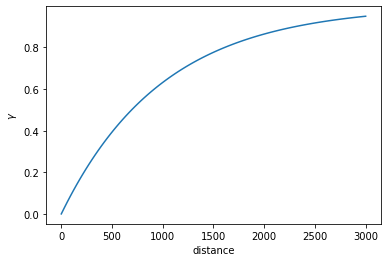

In [16]:
grid_gs.plot()
print("spatial variogram")

'recharge temporal variogram (x axis in days)'

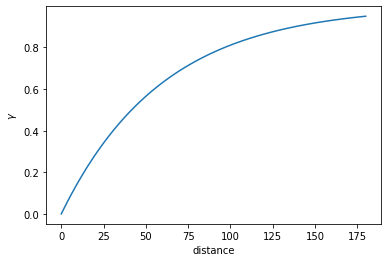

In [18]:
rch_temporal_gs.plot()
"recharge temporal variogram (x axis in days)"

Now let's get the idomain array to use as a zone array - this keeps us from setting up parameters in inactive model cells:

In [14]:
ib = m.dis.idomain[0].array

First, let's setup parameters for static properties - HK, VK, SS, SY.  Do that, we need to find all the external array files that contain these static arrays.  Let's do just HK slowly so as to explain what is happening:

In [21]:
hk_arr_files = [f for f in os.listdir(tmp_model_ws) if "npf_k_" in f and f.endswith(".txt")]
hk_arr_files

['freyberg6.npf_k_layer1.txt',
 'freyberg6.npf_k_layer3.txt',
 'freyberg6.npf_k_layer2.txt']

So those are the existing model input arrays for HK.  Notice we found the files in the temporary model workspace - `PstFrom` will copy all those files to the new model workspace for us in a bit...

Let's setup grid-scale multiplier parameter for HK in layer 1:

In [22]:
pf.add_parameters(filenames="freyberg6.npf_k_layer1.txt",par_type="grid",
                   par_name_base="hk_layer_1",pargp="hk_layer_1",zone_array=ib,
                   upper_bound=10.,lower_bound=0.1,ult_ubound=100,ult_lbound=0.01,
                   geostruct=grid_gs)


2020-05-08 11:24:25.720544 starting: adding parameters for file(s) freyberg6.npf_k_layer1.txt
2020-05-08 11:24:25.722347 starting: loading array freyberg6_template/freyberg6.npf_k_layer1.txt
2020-05-08 11:24:25.725350 finished: loading array freyberg6_template/freyberg6.npf_k_layer1.txt took: 0:00:00.003003
2020-05-08 11:24:25.725432 loaded array 'freyberg6.npf_k_layer1.txt' of shape (40, 20)
2020-05-08 11:24:25.727424 starting: writing array-based template file 'hk_layer_1_inst0_grid.csv.tpl'
2020-05-08 11:24:25.727503 starting: writing template file hk_layer_1_inst0_grid.csv.tpl for ['hk_layer_1_inst:0']
2020-05-08 11:24:25.746453 finished: writing template file hk_layer_1_inst0_grid.csv.tpl for ['hk_layer_1_inst:0'] took: 0:00:00.018950
2020-05-08 11:24:25.746678 finished: writing array-based template file 'hk_layer_1_inst0_grid.csv.tpl' took: 0:00:00.019254
2020-05-08 11:24:25.765922 finished: adding parameters for file(s) freyberg6.npf_k_layer1.txt took: 0:00:00.045378


What just happened there?  Well, we told our `PstFrom` instance to setup a set of grid-scale multiplier parameters (`par_type="grid"`) for the array file "freyberg6.npf_k_layer1.txt". We told it to prefix the parameter names with "hk_layer_1" and also to make the parameter group "hk_layer_1" (`pargp="hk_layer_1"`).  When specified two sets of bound information:  `upper_bound` and `lower_bound` are the standard control file bounds, while `ult_ubound` and `ult_lbound` are bounds that are applied at runtime to the resulting (multiplied out) model input array - since we are using multipliers (and potentially, sets of multipliers - stay tuned), it is important to make sure we keep the resulting model input arrays within the range of realistic values.

If you inspect the contents of the working directory, we will see a new template file:

In [25]:
[f for f in os.listdir(template_ws) if f.endswith(".tpl")]

['hk_layer_1_inst0_grid.csv.tpl']

In [29]:
with open(os.path.join(template_ws,"hk_layer_1_inst0_grid.csv.tpl"),'r') as f:
    for _ in range(2):
        print(f.readline().strip())
        

ptf ~
~   hk_layer_1_inst:0_i:0_j:0_x:125.00_y:9875.00_zone:1    ~ ~   hk_layer_1_inst:0_i:0_j:1_x:375.00_y:9875.00_zone:1    ~ ~   hk_layer_1_inst:0_i:0_j:2_x:625.00_y:9875.00_zone:1    ~ ~   hk_layer_1_inst:0_i:0_j:3_x:875.00_y:9875.00_zone:1    ~ ~   hk_layer_1_inst:0_i:0_j:4_x:1125.00_y:9875.00_zone:1    ~ ~   hk_layer_1_inst:0_i:0_j:5_x:1375.00_y:9875.00_zone:1    ~ ~   hk_layer_1_inst:0_i:0_j:6_x:1625.00_y:9875.00_zone:1    ~ ~   hk_layer_1_inst:0_i:0_j:7_x:1875.00_y:9875.00_zone:1    ~ ~   hk_layer_1_inst:0_i:0_j:8_x:2125.00_y:9875.00_zone:1    ~ ~   hk_layer_1_inst:0_i:0_j:9_x:2375.00_y:9875.00_zone:1    ~ ~   hk_layer_1_inst:0_i:0_j:10_x:2625.00_y:9875.00_zone:1    ~ ~   hk_layer_1_inst:0_i:0_j:11_x:2875.00_y:9875.00_zone:1    ~ ~   hk_layer_1_inst:0_i:0_j:12_x:3125.00_y:9875.00_zone:1    ~ ~   hk_layer_1_inst:0_i:0_j:13_x:3375.00_y:9875.00_zone:1    ~ ~   hk_layer_1_inst:0_i:0_j:14_x:3625.00_y:9875.00_zone:1    ~ ~   hk_layer_1_inst:0_i:0_j:15_x:3875.00_y:9875.00_zone:1    ~ 


So those might look like pretty redic parameter names, but they contain heaps of metadata to help you post process things later...

At this point, we have some parameters and some observations, so we can create a control file:

In [31]:
pst = pf.build_pst()

noptmax:30, npar_adj:706, nnz_obs:725


Oh snap! we did it!  thanks for playing...

Well, there is a little more to the story.  Like how do we run this thing? Lucky for you, `PstFrom` writes a forward run script for you! Say Wat?!

In [32]:
[f for f in os.listdir(template_ws) if f.endswith(".py")]

['forward_run.py']

In [33]:
with open(os.path.join(template_ws,"forward_run.py"),'r') as f:
    for line in f:
        print(line.strip())

import os
import multiprocessing as mp
import numpy as np
import pandas as pd
import pyemu
def main():

try:
os.remove('./heads.csv')
except Exception as e:
print('error removing tmp file:./heads.csv')
try:
os.remove('./sfr.csv')
except Exception as e:
print('error removing tmp file:./sfr.csv')
pyemu.helpers.apply_list_and_array_pars(arr_par_file='mult2model_info.csv')

if __name__ == '__main__':
mp.freeze_support()
main()



Not bad! We have everything we need...except a model run! Doh!  Let's add that:

In [39]:
# only execute this block once!
pf.mod_sys_cmds.append("mf6")
pst = pf.build_pst()


noptmax:30, npar_adj:706, nnz_obs:725
2020-05-08 11:37:55.601055 forward_run line:mf6
2020-05-08 11:37:55.601165 forward_run line:mf6
2020-05-08 11:37:55.601458 forward_run line:mf6
2020-05-08 11:37:55.601583 forward_run line:mf6
2020-05-08 11:37:55.601680 forward_run line:mf6
2020-05-08 11:37:55.601984 forward_run line:mf6


In [40]:
with open(os.path.join(template_ws,"forward_run.py"),'r') as f:
    for line in f:
        print(line,end="")

import os
import multiprocessing as mp
import numpy as np
import pandas as pd
import pyemu
def main():

    try:
       os.remove('./heads.csv')
    except Exception as e:
       print('error removing tmp file:./heads.csv')
    try:
       os.remove('./sfr.csv')
    except Exception as e:
       print('error removing tmp file:./sfr.csv')
    pyemu.helpers.apply_list_and_array_pars(arr_par_file='mult2model_info.csv')
    pyemu.os_utils.run(r'mf6')

    pyemu.os_utils.run(r'mf6')

    pyemu.os_utils.run(r'mf6')

    pyemu.os_utils.run(r'mf6')

    pyemu.os_utils.run(r'mf6')

    pyemu.os_utils.run(r'mf6')

    pyemu.os_utils.run(r'mf6')

    pyemu.os_utils.run(r'mf6')

    pyemu.os_utils.run(r'mf6')

    pyemu.os_utils.run(r'mf6')

    pyemu.os_utils.run(r'mf6')

    pyemu.os_utils.run(r'mf6')

    pyemu.os_utils.run(r'mf6')

    pyemu.os_utils.run(r'mf6')

    pyemu.os_utils.run(r'mf6')

    pyemu.os_utils.run(r'mf6')

    pyemu.os_utils.run(r'mf6')

    pyemu.os_utils.run(r'mf6')

    

That's better!  See the last line in `main()`?  

So that's nice, but let's also check out the super awesome prior parameter covariance matrix and prior parameter ensemble helpers in `PstFrom`:

2020-05-08 11:40:02.998046 starting: building prior covariance matrix
2020-05-08 11:40:03.153275 saving prior covariance matrix to file freyberg6_template/temp_pst_from
2020-05-08 11:40:03.317026 finished: building prior covariance matrix took: 0:00:00.318980


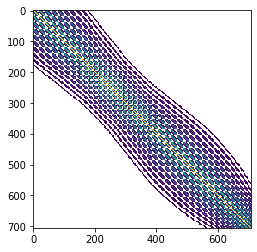

In [44]:
cov = pf.build_prior()
x = cov.x.copy()
x[x<0.01] = np.NaN
plt.imshow(x)

Da-um!  that's sweet ez!